In [1]:
# Importing required libraries
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

from functools import reduce
import matplotlib.pyplot as plt
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Mohannad\Documents\DS_course_project\data\weather-sa-2017-2019-clean.csv')

In [3]:
df.shape

(249023, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [5]:
# Display the top 5 rows
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [6]:
df.describe()

,Unnamed: 0,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


In [7]:
df.describe(include=[object])

,city,date,time,weather,humidity
count,249023,249023,249023,249023,249006
unique,13,850,710,81,92
top,Jawf,24 November 2018,07:00,Clear,13%
freq,20352,321,10415,98827,6903


In [8]:
# Checking for duplicated rows
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


In [9]:
# Drop unused columns
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df['city'].value_counts()

Jawf                20352
Mecca               20268
Tabuk               20240
Northern boarder    20235
Hail                20121
Madina              19965
Baha                19959
Najran              19847
Jazan               19829
Qassim              19793
EP                  18505
Riyadh              16421
Assir               13488
Name: city, dtype: int64

In [11]:
df.isnull().sum()

city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [12]:
df = df.fillna(method='ffill').fillna(method='bfill')

In [13]:
df.isnull().sum()

city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [14]:
# Remove the (%) form the 'humidity' column, then Divide values by 100
# Convert the 'humidity' column to int
df['humidity'] = df['humidity'].str.replace(r'\D', '')
df['humidity'] = df['humidity'].astype(int)
df['humidity'] = df['humidity']/100

In [15]:
df

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,0.64,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,0.64,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,0.72,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,0.72,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,0.72,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,0.14,1014.0,-1
249019,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,0.22,1015.0,-1
249020,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,0.24,1016.0,-1
249021,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,0.26,1017.0,16


In [16]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [17]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [18]:
# OrdinalEncoder is for encode categorical features as an integer array 
# Create our Ordinal Encoder object
ordinal = OrdinalEncoder()

# The categorical features
columns_to_enc = ['year', 'month', 'day', 'hour']

# Ordinal encode the columns
ordinal_train = ordinal.fit_transform(train[columns_to_enc])
ordinal_test = ordinal.transform(test[columns_to_enc])

# Convert ordinal_train and ordinal_test to a dataframes
train_ordinal = pd.DataFrame(ordinal_train, columns = columns_to_enc)
test_ordinal = pd.DataFrame(ordinal_test, columns = columns_to_enc)

In [19]:
# StandardScaler is for standardize features by removing the mean and scaling to unit variance
# Create our Standard Scaler object
scaler = StandardScaler()

# Features that need to Scale
columns_to_scale = ['temp', 'wind', 'humidity', 'barometer', 'visibility']

# Standard Scaling the columns
scaled_train = scaler.fit_transform(train[columns_to_scale])
scaled_test = scaler.transform(test[columns_to_scale])

# Convert scaled_train and scaled_test to a dataframes
train_scaled = pd.DataFrame(scaled_train, columns = columns_to_scale)
test_scaled = pd.DataFrame(scaled_test, columns = columns_to_scale)

In [20]:
# OneHotEncoder is for encode categorical features as a one-hot numeric array
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

# Features that need to One Hot encode
columns_to_onehot = ['city']

# One Hot encode the columns
one_hot_train = one_hot.fit_transform(train[columns_to_onehot]).toarray()
one_hot_test = one_hot.transform(test[columns_to_onehot]).toarray()

# The new column names after One Hot encode
column_names = ['city_Baha', 'city_Hail', 'city_Jawf', 'city_Jazan', 'city_Madina', 'city_Mecca', 'city_Najran',
                'city_Northern boarder', 'city_Qassim', 'city_Tabuk', 'city_Assir', 'city_EP', 'city_Riyadh']

# Convert one_hot_train and one_hot_test to a dataframes
train_one_hot = pd.DataFrame(one_hot_train, columns = column_names)
test_one_hot = pd.DataFrame(one_hot_test, columns = column_names)

In [21]:
# Add a new column to all these dataset which is there index
# To be able to merge these dataframes
train_ordinal['index'] = train_ordinal.index
test_ordinal['index'] = test_ordinal.index
train_scaled['index'] = train_scaled.index
test_scaled['index'] = test_scaled.index
train_one_hot['index'] = train_one_hot.index
test_one_hot['index'] = test_one_hot.index

In [22]:
trains = [train_ordinal, train_scaled, train_one_hot] # all train dataframes that we have created
tests  = [test_ordinal, test_scaled, test_one_hot]    # all test dataframes that we have created

# merage all the train and together by 'index' column, then merage the test dataframes
train = reduce(lambda left,right: pd.merge(left,right,on='index'), trains) 
test = reduce(lambda left,right: pd.merge(left,right,on='index'), tests)

In [23]:
# Split training and testing into features and target to predict 'temp' column
target = "temp" # The column that we will predict

X_train_temp = train.drop(target, axis=1) # features
y_train_temp = train[target] # target

X_test_temp = test.drop(target, axis=1) # features
y_test_temp = test[target] # target

In [25]:
# Define the model
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
reg_forest.fit(X_train_temp, y_train_temp) # fit the model

preds_forest_train = reg_forest.predict(X_train_temp) # predict the temperature in train dataset
preds_forest_test = reg_forest.predict(X_test_temp)   # predict the temperature in test dataset

# evaluate the model
print ("Training MAE", mean_absolute_error(y_train_temp, preds_forest_train))
print ("Testing MAE", mean_absolute_error(y_test_temp, preds_forest_test))

Training MAE 0.03607302985665086
Testing MAE 0.09800613460611655


In [26]:
from sklearn import metrics

print ("Training MSE", metrics.mean_squared_error(y_train_temp, preds_forest_train))
print ("Testing MSE", metrics.mean_squared_error(y_test_temp, preds_forest_test))

print ("Training R2", metrics.r2_score(y_train_temp, preds_forest_train))
print ("Testing R2", metrics.r2_score(y_test_temp, preds_forest_test))

Training MSE 0.0026980664161586013
Testing MSE 0.019428673324813444
Training R2 0.9973019335838414
Testing R2 0.9804725398788321


In [27]:
# Split training and testing into features and target to predict 'wind' column
target = "wind" # The column that we will predict

X_train_wind = train.drop(target, axis=1) # features
y_train_wind = train[target] # target

X_test_wind = test.drop(target, axis=1) # features
y_test_wind = test[target] # target

In [28]:
# define the model
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
reg_forest.fit(X_train_wind, y_train_wind) # fit the model

preds_forest_train = reg_forest.predict(X_train_wind) # predict the wind in train dataset
preds_forest_test = reg_forest.predict(X_test_wind)   # predict the wind in test dataset

# evaluate the model
print ("Training MAE", mean_absolute_error(y_train_wind, preds_forest_train))
print ("Testing MAE", mean_absolute_error(y_test_wind, preds_forest_test))

Training MAE 0.17012617628279697
Testing MAE 0.46576345560864835


In [29]:
# Define the model
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
reg_forest.fit(X_train_wind, y_train_wind) # fit the model

preds_forest_train = reg_forest.predict(X_train_wind) # predict the temperature in train dataset
preds_forest_test = reg_forest.predict(X_test_wind)   # predict the temperature in test dataset

# evaluate the model
print ("Training MAE", mean_absolute_error(y_train_wind, preds_forest_train))
print ("Testing MAE", mean_absolute_error(y_test_wind, preds_forest_test))

Training MAE 0.17012617628279697
Testing MAE 0.46576345560864835


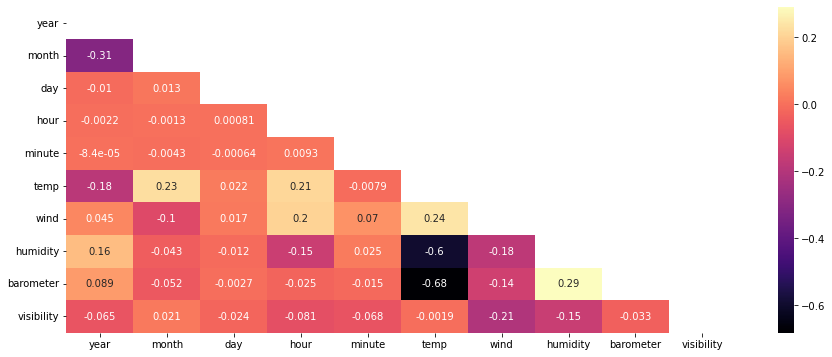

In [30]:
# Finding the relations between the variables
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap="magma",annot=True, mask=np.triu(df.corr()));